In [1]:
import numpy as np
from common.layers import MatMul

# CBOW모델

In [2]:
c0 = np.array([[1, 0, 0, 0, 0, 0, 0]]) # 입력
c1 = np.array([[0, 0, 1, 0, 0, 0, 0]]) # 입력

W_in = np.random.randn(7, 3) # 가중치
W_out = np.random.randn(3, 7) # 가중치

in_layer0 = MatMul(W_in)
in_layer1 = MatMul(W_in)
out_layer = MatMul(W_out)

h0 = in_layer0.forward(c0)
h1 = in_layer1.forward(c1)
h = 0.5 * (h0 + h1)
s = out_layer.forward(h)

print(s)

[[ 0.41699768 -2.72427752  0.5237478  -0.50623718 -1.96142794  1.66939483
   2.85897519]]


---

In [3]:
from common.util import preprocess

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

In [4]:
def create_contexts_target(corpus, window_size=1):
    target = corpus[window_size:-window_size] # 양 끝 제외
    contexts = []
    
    for idx in range(window_size, len(corpus)-window_size):
        cs = []
        for t in range(-window_size, window_size +1):
            if t == 0:
                continue
            cs.append(corpus[idx+t])
        contexts.append(cs)
    
    
    return np.array(contexts), np.array(target)

In [5]:
contexts, target = create_contexts_target(corpus, window_size=1)

In [6]:
print(contexts)

[[0 2]
 [1 3]
 [2 4]
 [3 1]
 [4 5]
 [1 6]]


In [7]:
print(target)

[1 2 3 4 1 5]


In [8]:
from common.util import convert_one_hot

In [9]:
vocab_size = len(word_to_id)

target = convert_one_hot(target, vocab_size) # (6, 7)
contexts = convert_one_hot(contexts, vocab_size) # (6,2,7)

In [14]:
from common.layers import SoftmaxWithLoss

In [15]:
class SimpleCBOW:
    def __init__(self, vocab_size, hidden_size):
        V, H = vocab_size, hidden_size

        # 가중치 초기화
        W_in = 0.01 * np.random.randn(V, H).astype('f')
        W_out = 0.01 * np.random.randn(H, V).astype('f')

        # 계층 생성
        self.in_layer0 = MatMul(W_in)
        self.in_layer1 = MatMul(W_in)
        self.out_layer = MatMul(W_out)
        self.loss_layer = SoftmaxWithLoss()

        # 모든 가중치와 기울기를 리스트에 모은다.
        layers = [self.in_layer0, self.in_layer1, self.out_layer]
        self.params, self.grads = [], []
        for layer in layers:
            self.params += layer.params
            self.grads += layer.grads

        # 인스턴스 변수에 단어의 분산 표현을 저장한다.
        self.word_vecs = W_in

    def forward(self, contexts, target):
        h0 = self.in_layer0.forward(contexts[:, 0])
        h1 = self.in_layer1.forward(contexts[:, 1])
        h = (h0 + h1) * 0.5
        score = self.out_layer.forward(h)
        loss = self.loss_layer.forward(score, target)
        return loss

    def backward(self, dout=1):
        ds = self.loss_layer.backward(dout)
        da = self.out_layer.backward(ds)
        da *= 0.5
        self.in_layer1.backward(da)
        self.in_layer0.backward(da)
        return None

## 학습

In [16]:
from common.trainer import Trainer
from common.optimizer import Adam

In [17]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

| 에폭 1 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 2 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 3 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 4 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 5 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 6 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 7 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 8 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 9 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 10 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 11 |  반복 1 / 2 | 시간 0[s] | 손실 1.95
| 에폭 12 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 13 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 14 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 15 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 16 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 17 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 18 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 19 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 20 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 21 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 22 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 23 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 24 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 25 |  반복 1 / 2 | 시간 0[s] | 손실 1.94
| 에폭 26 |

| 에폭 425 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 426 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 427 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 428 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 429 |  반복 1 / 2 | 시간 0[s] | 손실 0.81
| 에폭 430 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 431 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 432 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 433 |  반복 1 / 2 | 시간 0[s] | 손실 0.61
| 에폭 434 |  반복 1 / 2 | 시간 0[s] | 손실 0.93
| 에폭 435 |  반복 1 / 2 | 시간 0[s] | 손실 0.47
| 에폭 436 |  반복 1 / 2 | 시간 0[s] | 손실 0.87
| 에폭 437 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 438 |  반복 1 / 2 | 시간 0[s] | 손실 0.74
| 에폭 439 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 440 |  반복 1 / 2 | 시간 0[s] | 손실 0.86
| 에폭 441 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 442 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 443 |  반복 1 / 2 | 시간 0[s] | 손실 0.92
| 에폭 444 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 445 |  반복 1 / 2 | 시간 0[s] | 손실 0.67
| 에폭 446 |  반복 1 / 2 | 시간 0[s] | 손실 0.65
| 에폭 447 |  반복 1 / 2 | 시간 0[s] | 손실 0.85
| 에폭 448 |  반복 1 / 2 | 시간 0[s] | 손실 0.59
| 에폭 449 |  반복 1

| 에폭 883 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 884 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 885 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 886 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 887 |  반복 1 / 2 | 시간 0[s] | 손실 0.75
| 에폭 888 |  반복 1 / 2 | 시간 0[s] | 손실 0.43
| 에폭 889 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 890 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 891 |  반복 1 / 2 | 시간 0[s] | 손실 0.79
| 에폭 892 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 893 |  반복 1 / 2 | 시간 0[s] | 손실 0.32
| 에폭 894 |  반복 1 / 2 | 시간 0[s] | 손실 0.73
| 에폭 895 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 896 |  반복 1 / 2 | 시간 0[s] | 손실 0.62
| 에폭 897 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 898 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 899 |  반복 1 / 2 | 시간 0[s] | 손실 0.49
| 에폭 900 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 901 |  반복 1 / 2 | 시간 0[s] | 손실 0.66
| 에폭 902 |  반복 1 / 2 | 시간 0[s] | 손실 0.55
| 에폭 903 |  반복 1 / 2 | 시간 0[s] | 손실 0.38
| 에폭 904 |  반복 1 / 2 | 시간 0[s] | 손실 0.68
| 에폭 905 |  반복 1 / 2 | 시간 0[s] | 손실 0.60
| 에폭 906 |  반복 1 / 2 | 시간 0[s] | 손실 0.44
| 에폭 907 |  반복 1

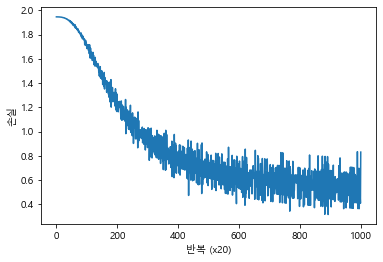

you [-0.8922739   0.9761028  -1.4597663   0.99288815  1.1829885 ]
say [ 1.1915832  -1.174423   -0.26618594 -1.1777295  -0.1621015 ]
goodbye [-0.9774653   0.8700917  -0.42429054  0.8433518   0.77029866]
and [ 0.9708675  -0.9292081  -1.5914861  -0.93609005 -1.5161375 ]
i [-0.9469133   0.88563114 -0.41366792  0.8580007   0.7786356 ]
hello [-0.8887421   0.9592355  -1.4460769   0.96969086  1.1967533 ]
. [ 1.0876831 -1.1098639  1.3674347 -1.0776263  1.5113773]


In [18]:
window_size = 1
hidden_size = 5
batch_size = 3
max_epoch = 1000

text = 'You say goodbye and I say hello.'
corpus, word_to_id, id_to_word = preprocess(text)

vocab_size = len(word_to_id)
contexts, target = create_contexts_target(corpus, window_size)
target = convert_one_hot(target, vocab_size)
contexts = convert_one_hot(contexts, vocab_size)

model = SimpleCBOW(vocab_size, hidden_size)
optimizer = Adam()
trainer = Trainer(model, optimizer)

trainer.fit(contexts, target, max_epoch, batch_size)
trainer.plot()

word_vecs = model.word_vecs
for word_id, word in id_to_word.items():
    print(word, word_vecs[word_id])